In [1]:
# Mount google drive
from google.colab import drive
ROOT = "/content/drive"
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [8]:
%cd content/MyDrive/Repos/simclr-pytorch-cvf/

/content/drive/MyDrive/Repos/simclr-pytorch-cvf


In [ ]:
!!pip install diffdist wldhx.yadisk-direct configargparse strconv

In [14]:
import sys
import configargparse
sys.path.append('./simclr-pytorch')

In [30]:
import myexman
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

index = myexman.Index('./logs/exman-train.py').info().set_index('id')

In [18]:
index

,arch,aug,batch_size,ckpt,color_dist_s,config_file,data,dist,dist_address,eval_freq,...,weight_decay,workers,world_size,time,augmentation,encoder_ckpt,finetune,precompute_emb_bs,test_bs,alt_transforms
id,,,,,,,,,,,,,,,,,,,,,
1,ResNet50,True,1024,,0.5,configs/cifar_train_epochs1000_bs1024.yaml,cifar,ddp,127.0.0.1:1234,4800,...,0.000001,2,1,2022-12-03 21:06:51,NaN,NaN,NaN,NaN,NaN,NaN
2,ResNet50,True,1024,,0.5,configs/cifar_train_epochs1000_bs1024.yaml,cifar,ddp,127.0.0.1:1234,4800,...,0.000001,2,1,2022-12-03 21:18:22,NaN,NaN,NaN,NaN,NaN,NaN
3,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-03 23:37:35,NaN,NaN,NaN,NaN,NaN,NaN
4,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-06 16:29:03,NaN,NaN,NaN,NaN,NaN,NaN
5,linear,True,1024,,NaN,configs/cifar_eval.yaml,cifar,dp,127.0.0.1:1234,1000,...,0.000100,2,1,2022-12-07 22:13:29,RandomCrop,logs/exman-train.py/runs/000004/checkpoint-120...,False,-1.0,1024.0,NaN
6,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 19:27:01,NaN,NaN,NaN,NaN,NaN,NaN
7,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 19:27:48,NaN,NaN,NaN,NaN,NaN,NaN
8,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 19:57:57,NaN,NaN,NaN,NaN,NaN,0.0
9,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 20:01:22,NaN,NaN,NaN,NaN,NaN,0.0


In [29]:
triple_train_log = pd.read_csv(str(index.loc[14].root) + '/logs.csv')
triple_eval_log = pd.read_csv(str(index.loc[18].root) + '/logs.csv')
double_train_log = pd.read_csv(str(index.loc[15].root) + '/logs.csv')
double_eval_log = pd.read_csv(str(index.loc[19].root) + '/logs.csv')
quad_train_log = pd.read_csv(str(index.loc[16].root) + '/logs.csv')
quad_eval_log = pd.read_csv(str(index.loc[20].root) + '/logs.csv')
grey_train_log = pd.read_csv(str(index.loc[27].root) + '/logs.csv')
grey_eval_log = pd.read_csv(str(index.loc[28].root) + '/logs.csv')
#logs.tail(2)
#index.loc[1].root

In [31]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

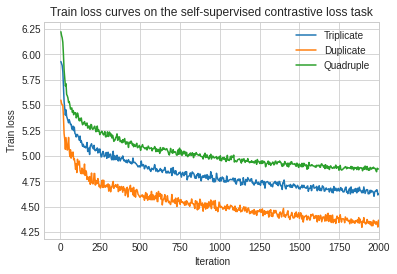

In [52]:
from matplotlib.style.core import load_base_library
fig = plt.figure()
ax = plt.axes()
x = triple_train_log['t']
ax.plot(x, triple_train_log['train_loss'], label="Triplicate")
ax.plot(double_train_log['t'], double_train_log['train_loss'],label="Duplicate")
ax.plot(quad_train_log['t'], quad_train_log['train_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Train loss curves on the self-supervised contrastive loss task')
plt.xlabel('Iteration')
plt.ylabel('Train loss')
plt.legend()

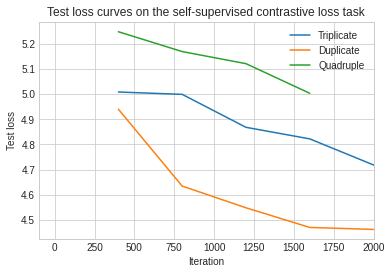

In [87]:
#triple_train_log[triple_train_log['test_loss']]
triple_train_filter = triple_train_log[triple_train_log['test_loss'].notnull()]
double_train_filter = double_train_log[double_train_log['test_loss'].notnull()]
quad_train_filter = quad_train_log[quad_train_log['test_loss'].notnull()]

triple_eval_filter = triple_eval_log[triple_eval_log['test_loss'].notnull()]
double_eval_filter = double_eval_log[double_eval_log['test_loss'].notnull()]
quad_eval_filter = quad_eval_log[quad_eval_log['test_loss'].notnull()]

fig = plt.figure()
ax = plt.axes()
x = triple_train_filter['t']
ax.plot(x, triple_train_filter['test_loss'], label="Triplicate")
ax.plot(double_train_filter['t'], double_train_filter['test_loss'],label="Duplicate")
ax.plot(quad_train_filter['t'], quad_train_filter['test_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Test loss curves on the self-supervised contrastive loss task')
plt.xlabel('Iteration')
plt.ylabel('Test loss')
plt.legend()

In [68]:
triple_train_log.columns

Index(['t', 'train_loss', 'train_contrast_acc', 'train_epoch', 'lr',
       'data_time', 'it_time', 'test_loss', 'test_contrast_acc'],
      dtype='object')

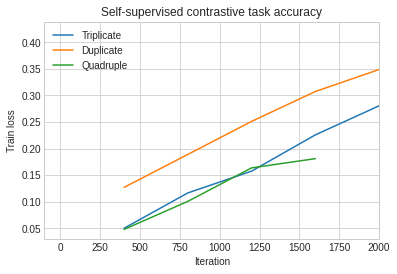

In [73]:
fig = plt.figure()
ax = plt.axes()
x = triple_train_filter['t']
ax.plot(x, triple_train_filter['test_contrast_acc'], label="Triplicate")
ax.plot(double_train_filter['t'], double_train_filter['test_contrast_acc'],label="Duplicate")
ax.plot(quad_train_filter['t'], quad_train_filter['test_contrast_acc'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Self-supervised contrastive task accuracy')
plt.xlabel('Iteration')
plt.ylabel('Train loss')
plt.legend()

TRIPLICATE EVAL

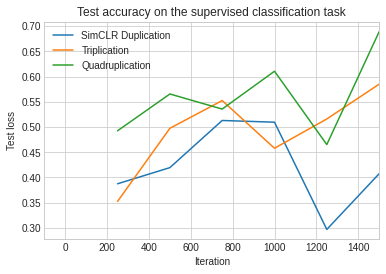

In [100]:
fig = plt.figure()
ax = plt.axes()
x = double_eval_filter['t']
ax.plot(x, double_eval_filter['test_acc'], label="SimCLR Duplication")
ax.plot(triple_eval_filter['t'], triple_eval_filter['test_acc'],label="Triplication")
ax.plot(quad_eval_filter['t'], quad_eval_filter['test_acc'],label="Quadruplication")
plt.xlim(-100, 1500)
plt.title('Test accuracy on the supervised classification task')
plt.xlabel('Iteration')
plt.ylabel('Test loss')
plt.legend()

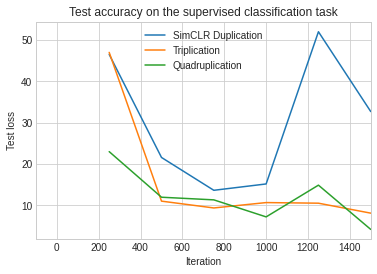

In [104]:
fig = plt.figure()
ax = plt.axes()
x = double_eval_filter['t']
ax.plot(x, double_eval_filter['test_loss'], label="SimCLR Duplication")
ax.plot(triple_eval_filter['t'], triple_eval_filter['test_loss'],label="Triplication")
ax.plot(quad_eval_filter['t'], quad_eval_filter['test_loss'],label="Quadruplication")
plt.xlim(-100, 1500)
plt.title('Test accuracy on the supervised classification task')
plt.xlabel('Iteration')
plt.ylabel('Test loss')
plt.legend()

In [101]:
double_eval_filter

,t,train_loss,train_acc,train_epoch,lr,data_time,it_time,test_loss,test_acc
4,250,53.653423,0.373021,5.102041,0.099689,0.074395,60.445545,46.490852,0.3875
9,500,34.380924,0.399420,10.204082,0.099376,0.076473,55.935940,21.571745,0.4195
14,750,36.843697,0.424016,15.306122,0.099064,0.078936,55.634937,13.633649,0.5129
19,1000,35.505947,0.419312,20.408163,0.098751,0.075401,55.852535,15.167801,0.5095
24,1250,31.197468,0.410160,25.510204,0.098439,0.074644,55.623448,51.965706,0.2971
29,1500,35.562004,0.409944,30.612245,0.098126,0.074743,55.835092,32.667828,0.4074


In [102]:
triple_eval_filter

,t,train_loss,train_acc,train_epoch,lr,data_time,it_time,test_loss,test_acc
4,250,16.076357,0.470720,5.102041,0.099689,0.075821,60.934284,46.976074,0.3526
9,500,13.797837,0.498902,10.204082,0.099376,0.082607,55.918105,11.012235,0.4974
14,750,17.152073,0.530985,15.306122,0.099064,0.077278,55.865799,9.364028,0.5524
19,1000,9.729958,0.548056,20.408163,0.098751,0.075809,55.982374,10.663846,0.4579
24,1250,13.950208,0.509603,25.510204,0.098439,0.076025,55.813717,10.516138,0.5159
29,1500,10.994582,0.537590,30.612245,0.098126,0.075932,55.825594,8.108315,0.5848


In [103]:
quad_eval_filter

,t,train_loss,train_acc,train_epoch,lr,data_time,it_time,test_loss,test_acc
4,250,10.919833,0.557698,5.102041,0.099689,0.081694,60.594561,22.981838,0.4925
9,500,12.672937,0.560991,10.204082,0.099376,0.076025,56.302644,11.958666,0.5654
14,750,10.326569,0.572711,15.306122,0.099064,0.074450,55.931240,11.320823,0.5355
19,1000,11.189275,0.581432,20.408163,0.098751,0.075200,55.892776,7.205184,0.6105
24,1250,8.135116,0.586861,25.510204,0.098439,0.076823,56.092286,14.875537,0.4652
29,1500,13.257053,0.589389,30.612245,0.098126,0.078287,56.025500,4.175620,0.6887


GREY MATTER

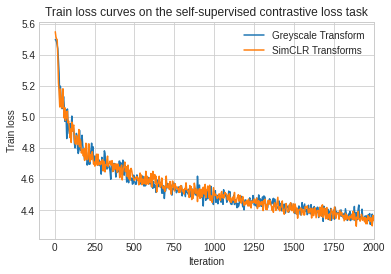

In [80]:
from matplotlib.style.core import load_base_library
fig = plt.figure()
ax = plt.axes()
x = grey_train_log['t']
ax.plot(x, grey_train_log['train_loss'], label="Greyscale Transform")
ax.plot(double_train_log['t'], double_train_log['train_loss'],label="SimCLR Transforms")
#ax.plot(grey_train_log['t'], grey_train_log['train_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Train loss curves on the self-supervised contrastive loss task')
plt.xlabel('Iteration')
plt.ylabel('Train loss')
plt.legend()

<ipython-input-88-09b74e54a0b2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grey_train_filter = grey_train_log[triple_train_log['test_loss'].notnull()]


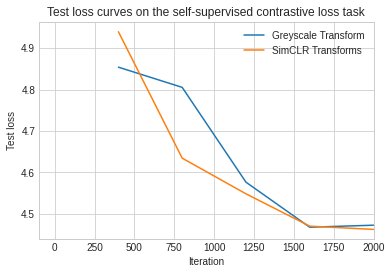

In [88]:
#triple_train_log[triple_train_log['test_loss']]
grey_train_filter = grey_train_log[triple_train_log['test_loss'].notnull()]
grey_eval_filter = grey_eval_log[grey_eval_log['test_loss'].notnull()]

fig = plt.figure()
ax = plt.axes()
x = grey_train_filter['t']
ax.plot(x, grey_train_filter['test_loss'], label="Greyscale Transform")
ax.plot(double_train_filter['t'], double_train_filter['test_loss'],label="SimCLR Transforms")
#ax.plot(quad_train_filter['t'], quad_train_filter['test_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Test loss curves on the self-supervised contrastive loss task')
plt.xlabel('Iteration')
plt.ylabel('Test loss')
plt.legend()

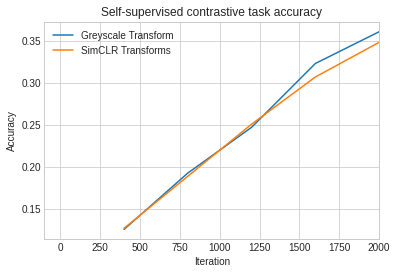

In [86]:
fig = plt.figure()
ax = plt.axes()
x = grey_train_filter['t']
ax.plot(x, grey_train_filter['test_contrast_acc'], label="Greyscale Transform")
ax.plot(double_train_filter['t'], double_train_filter['test_contrast_acc'],label="SimCLR Transforms")
#ax.plot(quad_train_filter['t'], quad_train_filter['test_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Self-supervised contrastive task accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

EVAL

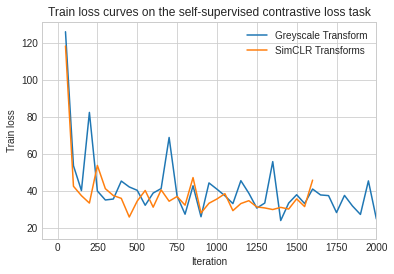

In [85]:
fig = plt.figure()
ax = plt.axes()
x = grey_eval_log['t']
ax.plot(x, grey_eval_log['train_loss'], label="Greyscale Transform")
ax.plot(double_eval_log['t'], double_eval_log['train_loss'],label="SimCLR Transforms")
#ax.plot(grey_train_log['t'], grey_train_log['train_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Train loss curves on the supervised classification task')
plt.xlabel('Iteration')
plt.ylabel('Train loss')
plt.legend()

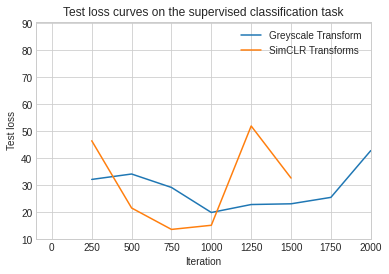

In [91]:
fig = plt.figure()
ax = plt.axes()
x = grey_eval_filter['t']
ax.plot(x, grey_eval_filter['test_loss'], label="Greyscale Transform")
ax.plot(double_eval_filter['t'], double_eval_filter['test_loss'],label="SimCLR Transforms")
#ax.plot(quad_train_filter['t'], quad_train_filter['test_loss'],label="Quadruple")
plt.xlim(-100, 2000)
plt.title('Test loss curves on the supervised classification task')
plt.xlabel('Iteration')
plt.ylabel('Test loss')
plt.legend()

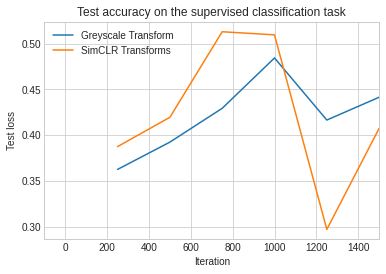

In [94]:
fig = plt.figure()
ax = plt.axes()
x = grey_eval_filter['t']
ax.plot(x, grey_eval_filter['test_acc'], label="Greyscale Transform")
ax.plot(double_eval_filter['t'], double_eval_filter['test_acc'],label="SimCLR Transforms")
#ax.plot(quad_train_filter['t'], quad_train_filter['test_loss'],label="Quadruple")
plt.xlim(-100, 1500)
plt.title('Test accuracy on the supervised classification task')
plt.xlabel('Iteration')
plt.ylabel('Test loss')
plt.legend()

In [96]:
grey_eval_filter

,t,train_loss,train_acc,train_epoch,lr,data_time,it_time,test_loss,test_acc
4,250,39.826061,0.397519,5.102041,0.099689,0.076057,53.979512,32.163109,0.3626
9,500,40.189449,0.398499,10.204082,0.099376,0.075698,49.793319,34.167660,0.3924
14,750,37.084911,0.415471,15.306122,0.099064,0.075865,49.832127,29.191090,0.4293
19,1000,40.799267,0.406064,20.408163,0.098751,0.076778,49.810667,19.910418,0.4843
24,1250,30.585579,0.433796,25.510204,0.098439,0.076742,49.808273,22.858807,0.4165
29,1500,37.801659,0.396754,30.612245,0.098126,0.076106,49.744513,23.128006,0.4414
34,1750,28.164295,0.436657,35.714286,0.097814,0.076414,49.787762,25.509800,0.4418
39,2000,24.720924,0.459058,40.816327,0.097501,0.077581,49.825901,42.832710,0.3522
44,2250,34.008587,0.431640,45.918367,0.097189,0.076434,49.810658,28.046717,0.4656
49,2500,29.219376,0.425702,51.020408,0.096876,0.076744,49.825773,17.932606,0.5059


In [97]:
double_eval_filter

,t,train_loss,train_acc,train_epoch,lr,data_time,it_time,test_loss,test_acc
4,250,53.653423,0.373021,5.102041,0.099689,0.074395,60.445545,46.490852,0.3875
9,500,34.380924,0.399420,10.204082,0.099376,0.076473,55.935940,21.571745,0.4195
14,750,36.843697,0.424016,15.306122,0.099064,0.078936,55.634937,13.633649,0.5129
19,1000,35.505947,0.419312,20.408163,0.098751,0.075401,55.852535,15.167801,0.5095
24,1250,31.197468,0.410160,25.510204,0.098439,0.074644,55.623448,51.965706,0.2971
29,1500,35.562004,0.409944,30.612245,0.098126,0.074743,55.835092,32.667828,0.4074


In [95]:
index

,arch,aug,batch_size,ckpt,color_dist_s,config_file,data,dist,dist_address,eval_freq,...,weight_decay,workers,world_size,time,augmentation,encoder_ckpt,finetune,precompute_emb_bs,test_bs,alt_transforms
id,,,,,,,,,,,,,,,,,,,,,
1,ResNet50,True,1024,,0.5,configs/cifar_train_epochs1000_bs1024.yaml,cifar,ddp,127.0.0.1:1234,4800,...,0.000001,2,1,2022-12-03 21:06:51,NaN,NaN,NaN,NaN,NaN,NaN
2,ResNet50,True,1024,,0.5,configs/cifar_train_epochs1000_bs1024.yaml,cifar,ddp,127.0.0.1:1234,4800,...,0.000001,2,1,2022-12-03 21:18:22,NaN,NaN,NaN,NaN,NaN,NaN
3,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-03 23:37:35,NaN,NaN,NaN,NaN,NaN,NaN
4,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-06 16:29:03,NaN,NaN,NaN,NaN,NaN,NaN
5,linear,True,1024,,NaN,configs/cifar_eval.yaml,cifar,dp,127.0.0.1:1234,1000,...,0.000100,2,1,2022-12-07 22:13:29,RandomCrop,logs/exman-train.py/runs/000004/checkpoint-120...,False,-1.0,1024.0,NaN
6,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 19:27:01,NaN,NaN,NaN,NaN,NaN,NaN
7,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 19:27:48,NaN,NaN,NaN,NaN,NaN,NaN
8,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 19:57:57,NaN,NaN,NaN,NaN,NaN,0.0
9,ResNet50,True,256,,0.5,configs/cifar_train_epochs60_bs256.yaml,cifar,ddp,127.0.0.1:1234,1200,...,0.000001,2,1,2022-12-08 20:01:22,NaN,NaN,NaN,NaN,NaN,0.0
